Nama : Natasya Ate Malem Bangun

NIM  : 121140052


## IDENTIFIKASI PENYAKIT PADA DAUN BIBIT KELAPA SAWIT DENGAN PENDEKATAN NA¨IVE BAYES MENGGUNAKAN OPTIMASI GENETIC ALGORITHM DAN PARTICLE SWARM OPTIMIZATION

### (STUDI KASUS: PT PERKEBUNAN NUSANTARA IV REGIONAL 7 KEBUN BEKRI)

In [ ]:
!python --version

Python 3.11.12


# Modules Needed

In [ ]:
gajas!pip install pyswarms geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.4 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=e08a6bfd4d59954fdca46bcf6efef386f22d899deaae4e3a5da3e1aa40af5d51
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [ ]:
import os                                                                       # for accessing the system files in gdrive especially <untuk mengakses file sistem di yang tersimpan di gdrive>
import cv2                                                                      # for doing image preprocessing <untuk melakukan prapemprosesan gambar>
import numpy as np                                                              # for working with image arrrays
import matplotlib.pyplot as plt                                                 # for showing image of the leaf dataset
from tqdm import tqdm                                                           # for creating progress bar on a long running loops
from sklearn.cluster import KMeans                                              #
import pandas as pd                                                             # for creating and manipulating dataframe of the dataset
from scipy import ndimage
from skimage.feature import graycomatrix, graycoprops                           # calculate gray level coocurance matrix and its properties for texture values
from sklearn.model_selection import train_test_split                            # For splitting data
from sklearn.preprocessing import StandardScaler                                # For scaling features
from sklearn.naive_bayes import GaussianNB                                      # The classifier
from sklearn.metrics import (                                                   # For evaluation metrics
   accuracy_score,
   classification_report,
   confusion_matrix,
   ConfusionMatrixDisplay
) # contain function for evaluating model performance
import seaborn as sns                                                           # for creating confusion matrix
import pyswarms as ps                                                           # for optimizing hyperparameter using particle swarm optimization
from geneticalgorithm import geneticalgorithm as ga                             # for optimizing hyperparaemeter using genetic algorithm
import joblib                                                                   # for exporting ml model (python object)

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')                                                   # connecting to google drive to retrieve image dataset

Mounted at /content/drive


# Batch Process Function
This Python function `batch_process_images` is designed to apply a given processing function to a collection of images, where the images are organized into categories (labels).

Let's break down its components:

1.  **`def batch_process_images(image_dataset, process_func):`**
    *   Defines a function named `batch_process_images`.
    *   It takes two arguments:
        *   `image_dataset (dict)`: This is expected to be a Python dictionary.
            *   The **keys** of this dictionary are strings representing labels or categories (e.g., "cats", "dogs", "melanoma", "normal").
            *   The **values** associated with each key are lists of images. Each image in the list is typically a NumPy array (as commonly used by libraries like OpenCV or Pillow).
            *   Example structure:
                ```python
                image_dataset = {
                    "label1": [image1_array, image2_array, ...],
                    "label2": [imageA_array, imageB_array, ...],
                    ...
                }
                ```
        *   `process_func (function)`: This is a function that will be applied to each individual image. This `process_func` must accept one argument (an image array) and return the processed image array.

2.  `"""Docstring"""`
    *   Provides a brief explanation of what the function does, its arguments, and what it returns. This is good practice for code readability and maintainability.

3.  **`processed_images = {}`**
    *   Initializes an empty dictionary named `processed_images`.
    *   This dictionary will store the results. It will have the same keys (labels) as the input `image_dataset`, but its values will be lists of the *processed* images.

4.  **`for label, images in image_dataset.items():`**
    *   This loop iterates through each key-value pair in the input `image_dataset` dictionary.
    *   In each iteration:
        *   `label` will hold the current category name (e.g., "label1").
        *   `images` will hold the list of image arrays associated with that `label`.

5.  **`processed_images[label] = []`**
    *   Inside the first loop, for the current `label`, it creates a new empty list as the value for that `label` in the `processed_images` dictionary. This prepares a container to store the processed images belonging to the current `label`.

6.  **`for img in tqdm(images, desc=f"Processing {label}"):`**
    *   This is a nested loop. It iterates through each individual `img` (image array) within the `images` list (which corresponds to the current `label`).
    *   `tqdm(images, desc=f"Processing {label}")`: This is a nice touch for user experience. `tqdm` is a library that creates a progress bar.
        *   It wraps the `images` iterable, so as the loop progresses, `tqdm` will display a progress bar.
        *   `desc=f"Processing {label}"` sets a descriptive text for the progress bar, like "Processing label1", "Processing label2", etc., making it clear which category is currently being processed.

7.  **`processed_img = process_func(img)`**
    *   This is the core of the processing. It calls the `process_func` (which was passed as an argument to `batch_process_images`) and passes the current `img` to it.
    *   The `process_func` does its work (e.g., resizing, converting to grayscale, applying a filter) and returns the modified image.
    *   The returned processed image is stored in the `processed_img` variable.

8.  **`processed_images[label].append(processed_img)`**
    *   The `processed_img` (the result from `process_func`) is then appended to the list associated with the current `label` in the `processed_images` dictionary.

9.  **`return processed_images`**
    *   After iterating through all labels and all images within each label, the function returns the `processed_images` dictionary. This dictionary contains all the original labels, but now the lists associated with them contain the images after they have been processed by `process_func`.

**In essence, this function provides a clean and organized way to:**

1.  Take a dataset of images grouped by labels.
2.  Apply a custom image transformation/processing step to every single image in the dataset.
3.  Return a new dataset with the same structure but containing the transformed images.
4.  Provide visual feedback on the progress using `tqdm`.

**Example Usage:**

```python
import numpy as np
import cv2 # Assuming OpenCV for image operations
from tqdm import tqdm # Make sure tqdm is installed

# Dummy image data
dataset = {
    "class_A": [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(3)],
    "class_B": [np.random.randint(0, 256, (120, 80, 3), dtype=np.uint8) for _ in range(2)]
}

# Define a simple processing function (e.g., resize and convert to grayscale)
def resize_and_gray(image_array):
    resized_img = cv2.resize(image_array, (64, 64))
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    return gray_img

# Use the batch_process_images function
processed_dataset = batch_process_images(dataset, resize_and_gray)

# Now processed_dataset will contain:
# {
#   "class_A": [processed_img1, processed_img2, processed_img3], # each is 64x64 grayscale
#   "class_B": [processed_imgA, processed_imgB]                 # each is 64x64 grayscale
# }

print(f"Processed image shape for class_A, first image: {processed_dataset['class_A'][0].shape}")
print(f"Processed image shape for class_B, first image: {processed_dataset['class_B'][0].shape}")
```

In [ ]:
def batch_process_images(image_dataset, process_func):
    """
    Batch process images from a dictionary of images.

    Args:
    - image_dataset (dict): A dictionary where keys are labels and values are lists of images.
    - process_func (function): Function to apply to each image.

    Returns:
    - dict: A dictionary where keys are labels and values are lists of processed images.
    """

    # a dictionary that will contain a label with each label containing a list of np.array images
    processed_images = {}

    # Iterate through each label and its images
    for label, images in image_dataset.items():
        # create a new key for the label that is a list
        processed_images[label] = []

        # Process each image in the label
        for img in tqdm(images, desc=f"Processing {label}"):
            # use the function argument to process the image
            processed_img = process_func(img)
            # add that image to the list of said label
            processed_images[label].append(processed_img)

    # return the dictionary
    return processed_images

# Read Image Function
Python function `read_image_dataset`.

**Purpose:**

The primary goal of this function is to load an image dataset from a specific directory structure. It assumes that your dataset is organized into subfolders, where each subfolder's name represents a class label (e.g., "cats", "dogs", "melanoma", "normal"), and the files within that subfolder are the images belonging to that class.

**How it Works Step-by-Step:**

1.  **`def read_image_dataset(dataset_path):`**
    *   Defines a function named `read_image_dataset` that takes one argument:
        *   `dataset_path (str)`: A string representing the file system path to the main dataset directory.

2.  **`"""Docstring"""`**
    *   This is a standard Python docstring explaining what the function does, its arguments, and what it returns.

3.  **`image_dataset = {}`**
    *   Initializes an empty Python dictionary named `image_dataset`.
    *   This dictionary will be used to store the loaded images. The keys of this dictionary will be the label names (subfolder names), and the values will be lists of images (as NumPy arrays) belonging to that label.
    *   Example structure after population:
        ```python
        {
            "label1": [image_array1, image_array2, ...],
            "label2": [image_arrayA, image_arrayB, ...],
            ...
        }
        ```

4.  **`for label in os.listdir(dataset_path):`**
    *   `os.listdir(dataset_path)`: This function from the `os` module returns a list of all files and directories directly within the `dataset_path`.
    *   The loop iterates through each entry (which is assumed to be a subfolder representing a class label) found in the `dataset_path`. The `label` variable will hold the name of each subfolder in turn (e.g., "cats", "dogs").

5.  **`label_path = os.path.join(dataset_path, label)`**
    *   `os.path.join()`: This intelligently combines the `dataset_path` and the current `label` (subfolder name) to create a full, platform-independent path to that subfolder. For example, if `dataset_path` is "data" and `label` is "cats", `label_path` becomes "data/cats" (or "data\\cats" on Windows).

6.  **`if not os.path.isdir(label_path): continue`**
    *   `os.path.isdir(label_path)`: Checks if the `label_path` is actually a directory.
    *   This is an important check to skip any regular files that might be present in the root `dataset_path` (e.g., a "readme.txt" or ".DS_Store" file). If it's not a directory, the `continue` statement skips the rest of the code in this loop iteration and moves to the next `label`.

7.  **`image_dataset[label] = []`**
    *   If `label_path` is confirmed to be a directory, this line creates a new entry in the `image_dataset` dictionary.
    *   The `label` (subfolder name) becomes a key, and its value is initialized as an empty list. This list will soon be filled with the images read from this subfolder.

8.  **`for img_name in tqdm(os.listdir(label_path), desc=f"Reading {label}"):`**
    *   This is a nested loop. `os.listdir(label_path)` now lists all files *inside* the current `label_path` (e.g., all image files within the "data/cats" folder).
    *   `tqdm(...)`: This wraps the list of image names with the `tqdm` progress bar utility.
        *   `desc=f"Reading {label}"`: Sets a descriptive text for the progress bar, like "Reading cats", "Reading dogs", etc., which is very helpful for monitoring the loading process, especially with large datasets.
    *   The loop iterates through each `img_name` (e.g., "cat1.jpg", "cat2.png") in the current label's subfolder.

9.  **`img_path = os.path.join(label_path, img_name)`**
    *   Constructs the full path to the individual image file (e.g., "data/cats/cat1.jpg").

10. **`img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)`**
    *   `cv2.imread(img_path, ...)`: This is the OpenCV function to read an image from the specified `img_path`.
    *   `cv2.IMREAD_UNCHANGED`: This flag tells OpenCV to load the image as is. If the image has an alpha channel (for transparency, like in some PNGs), it will be loaded as a 4-channel image (e.g., BGRA). If it's a standard color image, it will be loaded as a 3-channel BGR image. If it's grayscale, it'll be loaded as a single-channel image.
    *   The loaded image data (a NumPy array) is stored in the `img` variable.

11. **`if img is not None:`**
    *   This is an error check. `cv2.imread` returns `None` if it fails to read the image (e.g., the file is corrupted, not a recognized image format, or the path is incorrect).
    *   If `img` is `None`, it means the image couldn't be loaded, so it's skipped.

12. **`image_dataset[label].append(img)`**
    *   If the image was successfully read (`img` is not `None`), the image (NumPy array) is appended to the list associated with the current `label` in the `image_dataset` dictionary.

13. **`return image_dataset`**
    *   After all subfolders (labels) and all images within them have been processed, the function returns the `image_dataset` dictionary, which now contains all the successfully loaded images, organized by their labels.

**In summary, `read_image_dataset` is a utility function that:**

*   Expects a directory containing subdirectories.
*   Treats each subdirectory name as a class label.
*   Reads all image files from within each subdirectory.
*   Stores these images (as NumPy arrays) in a dictionary, mapping labels to lists of their corresponding images.
*   Includes basic error handling for non-directory items and unreadable image files.
*   Uses `tqdm` to provide a user-friendly progress bar during the loading process.

In [ ]:
def read_image_dataset(dataset_path):
    """
    Read images from a dataset directory with subfolders.

    Args:
    - dataset_path (str): Path to the dataset folder containing subfolders of images.

    Returns:
    - dict: A dictionary where keys are labels (folder names) and values are lists of images.
    """
    image_dataset = {}

    # Iterate through each subfolder (label) in the dataset
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue

        image_dataset[label] = []

        # Iterate through each image in the subfolder
        for img_name in tqdm(os.listdir(label_path), desc=f"Reading {label}"):
            img_path = os.path.join(label_path, img_name)

            # Read the image
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            if img is not None:
                image_dataset[label].append(img)

    return image_dataset

# Getting The Images

In [ ]:
dataset_path = '/content/drive/MyDrive/Projek_Sawit_PakMeida/1_Hibah_NaiveBayes/dataset/Daun_Augmented_Naive Bayes'

dataset_images = read_image_dataset(dataset_path)

Reading daun_menguning: 100%|██████████| 65/65 [00:00<00:00, 119.02it/s]


# Showing One of The Images

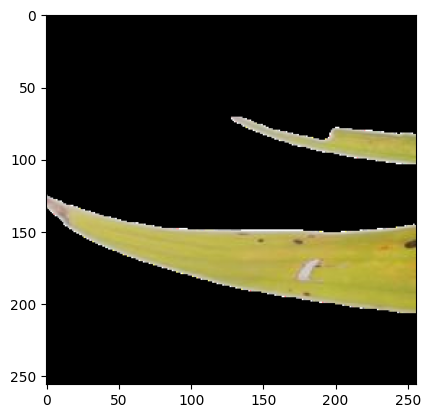

In [ ]:
# Display the processed image (optional)
plt.imshow(cv2.cvtColor(dataset_images['daun_menguning'][10], cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

# Extract RGB Function
This Python function `extract_rgb` is designed to calculate the *average normalized color* of an image, but with a specific consideration: it only takes into account pixels that are not fully transparent. This is particularly useful for images that have an alpha channel (like PNGs) where some parts might be transparent.

Let's break down the function step-by-step:

1.  **`def extract_rgb(image):`**
    *   Defines a function named `extract_rgb` that takes one argument:
        *   `image`: This is expected to be a NumPy array representing an image. The docstring clarifies it expects an RGBA image, meaning it should have 4 channels: Red, Green, Blue, and Alpha. The shape would typically be `(height, width, 4)`.

2.  **`"""Docstring"""`**
    *   Explains the function's purpose, its arguments (specifically noting the expected RGBA format), and what it returns.

3.  **`image = image.astype(np.float64)`**
    *   **What it does:** Converts the data type of the image array to `np.float64` (double-precision floating-point numbers).
    *   **Why:**
        *   Image data is often loaded as unsigned 8-bit integers (`uint8`), with values ranging from 0 to 255.
        *   For calculations like `mean` and especially for division during normalization, using floating-point numbers prevents data loss and ensures more accurate results. `float64` provides high precision.

4.  **`mask = image[:,:,3] > 0`**
    *   **What it does:** This line creates a boolean mask to identify non-transparent pixels.
        *   `image[:,:,3]`: This slices the NumPy array to select the 4th channel (index 3) across all rows (`:`) and columns (`:`). In an RGBA image, the 4th channel is the Alpha channel. Alpha values typically range from 0 (fully transparent) to 255 (fully opaque).
        *   `> 0`: This performs an element-wise comparison. For each pixel's alpha value, it checks if it's greater than 0.
        *   The result, `mask`, is a 2D NumPy array of the same height and width as the image, containing `True` where the original pixel's alpha was greater than 0 (i.e., the pixel is at least partially opaque/visible) and `False` where the alpha was 0 (fully transparent).
    *   **Why:** The function aims to "ignore transparent pixels." This mask allows subsequent calculations to be performed only on the visible parts of the image.

5.  **`r_mean = np.mean(image[:,:,0][mask])`**
    *   **What it does:** Calculates the mean (average) value of the red channel for non-transparent pixels.
        *   `image[:,:,0]`: Selects the red channel (index 0) of the image.
        *   `[mask]`: This is powerful NumPy boolean indexing. It uses the `mask` created in the previous step to select only those elements from the red channel where the corresponding value in `mask` is `True`. In effect, it filters out the red values of transparent pixels.
        *   `np.mean(...)`: Calculates the average of these selected red channel values.
    *   **Why:** To find the average red component of the visible parts of the image.

6.  **`g_mean = np.mean(image[:,:,1][mask])`**
    *   **What it does:** Similar to `r_mean`, but for the green channel (index 1). It calculates the average green value of the non-transparent pixels.

7.  **`b_mean = np.mean(image[:,:,2][mask])`**
    *   **What it does:** Similar to `r_mean` and `g_mean`, but for the blue channel (index 2). It calculates the average blue value of the non-transparent pixels.

8.  **`total = r_mean + g_mean + b_mean`**
    *   **What it does:** Sums the calculated mean red, green, and blue values.
    *   **Why:** This `total` will be used as the denominator for normalization. If all mean values are 0 (e.g., the visible part of the image is completely black), `total` will be 0. If the image is very bright, `total` will be larger.

9.  **`return (r_mean/total, g_mean/total, b_mean/total)`**
    *   **What it does:**
        *   Divides each of the `r_mean`, `g_mean`, and `b_mean` by the `total`. This is the normalization step.
        *   Returns a tuple containing these three normalized values.
    *   **Why (Normalization):**
        *   Normalization scales the R, G, B values so that they represent the *proportion* of each color component relative to the total intensity of the average color.
        *   The sum of the returned normalized R, G, and B values will be 1 (unless `total` was 0, in which case you might get `nan` - Not a Number - values if `r_mean`, `g_mean`, `b_mean` were also 0, or `inf` if some were non-zero and total was 0, though the latter is less likely if `r_mean`, `g_mean`, `b_mean` are non-negative).
        *   This makes the color representation independent of the overall brightness of the image. For example, a light red and a dark red would have different `(r_mean, g_mean, b_mean)` values but might have similar normalized values if their hue is the same.

**In summary:**

The function `extract_rgb` computes a single, representative color for an RGBA image. It does this by:
1.  Identifying which pixels are visible (not fully transparent) using the alpha channel.
2.  Calculating the average Red, Green, and Blue values across only these visible pixels.
3.  Normalizing these average R, G, B values so that they sum to 1, giving a proportional representation of the dominant color hue in the visible parts of the image.

**Potential Edge Case:**
*   If `total` is 0 (e.g., if all visible pixels are black, `r_mean=0, g_mean=0, b_mean=0`), the division by zero will result in `nan` (Not a Number) for each component. The function doesn't explicitly handle this, so the caller might receive `(nan, nan, nan)`.
*   If the `mask` is all `False` (a completely transparent image), `np.mean` on an empty slice will return `nan`, and thus the function will return `(nan, nan, nan)`.

In [ ]:
def extract_rgb(image):
    """
    Extract normalized RGB values from image, ignoring transparent pixels.
    Args:
        image: numpy array of shape (height, width, 4) representing RGBA image
    Returns:
        tuple of normalized (r, g, b) values
    """
    # Convert to double precision
    image = image.astype(np.float64)

    # Create mask for non-transparent pixels (alpha > 0)
    # mask = image[:,:,3] > 0

    if image.shape[2] == 4:  # RGBA image
      # Create mask for non-transparent pixels (alpha > 0)
      mask = image[:,:,3] > 0
      # Calculate mean of RGB values only where mask is True
      r_mean = np.mean(image[:,:,0][mask])
      g_mean = np.mean(image[:,:,1][mask])
      b_mean = np.mean(image[:,:,2][mask])
    else:  # RGB image
        # Calculate mean of RGB values directly
      r_mean = np.mean(image[:,:,0])
      g_mean = np.mean(image[:,:,1])
      b_mean = np.mean(image[:,:,2])

    # Calculate mean of RGB values only where mask is True
    #r_mean = np.mean(image[:,:,0][mask])
    #g_mean = np.mean(image[:,:,1][mask])
    #b_mean = np.mean(image[:,:,2][mask])

    # Normalize
    total = r_mean + g_mean + b_mean
    return (r_mean/total, g_mean/total, b_mean/total)

# Extract Texture Function
This Python function `extract_texture` is designed to compute a set of texture features from a grayscale image using the Gray Level Co-occurrence Matrix (GLCM) method. GLCM is a statistical method that examines the spatial relationship of pixels by tabulating how often different combinations of pixel gray levels occur in an image, given a certain offset (distance and angle).

Let's break down the function:

1.  **`def extract_texture(image):`**
    *   Defines a function named `extract_texture`.
    *   It takes one argument:
        *   `image`: A NumPy array representing a grayscale image. The docstring specifies its shape as `(height, width)`.

2.  **`"""Docstring"""`**
    *   Provides a concise explanation of the function's purpose, arguments, and return values.

3.  **`if image.dtype != np.uint8:`**
    *   Checks if the data type of the input `image` is not already `np.uint8` (unsigned 8-bit integer, which typically represents pixel values from 0 to 255).
    *   **`image = (image * 255).astype(np.uint8)`**
        *   If the image is not `uint8` (e.g., it might be a float array normalized between 0.0 and 1.0), this line first scales its values by multiplying by 255 (to bring them into the 0-255 range) and then converts the data type to `np.uint8`.
        *   This step ensures that the image has pixel values in the standard 0-255 integer range, which is often expected by image processing functions, including GLCM computations.

4.  **`image = (image / 32).astype(np.uint8)`**
    *   **Purpose:** This line reduces the number of gray levels in the image.
    *   **How it works:** It performs integer division of each pixel value by 32.
        *   Pixels with original values 0-31 will become 0.
        *   Pixels with original values 32-63 will become 1.
        *   ...
        *   Pixels with original values 224-255 will become 7.
    *   **Result:** The image, which originally had up to 256 gray levels (0-255), is now quantized into 8 gray levels (0-7).
    *   **Why?**
        *   The comment "Reduce to 8 gray levels as MATLAB does by default" indicates an intention to replicate a behavior found in MATLAB's GLCM implementation.
        *   Reducing the number of gray levels can make the GLCM computation faster and the resulting matrix smaller.
        *   It can sometimes make texture features more robust by grouping similar intensity variations.

5.  **`glcm = graycomatrix(image, distances=[1], angles=[0, 45, 90, 135], levels=8, symmetric=True, normed=True)`**
    *   This is the core step where the GLCMs are calculated using the `graycomatrix` function from `skimage.feature`.
    *   `image`: The input image, now quantized to 8 gray levels.
    *   `distances=[1]`: Specifies the pixel pair distance(s) to consider. Here, only a distance of 1 pixel is used.
    *   `angles=[0, 45, 90, 135]`: Specifies the angles (in degrees) for the pixel pairs.
        *   `0`: Horizontal
        *   `45`: Diagonal (top-right to bottom-left, if origin is top-left)
        *   `90`: Vertical
        *   `135`: Anti-diagonal (top-left to bottom-right)
        *   *(Note: `skimage.feature.graycomatrix` actually expects angles in radians. If integers are passed like this, it might interpret them incorrectly or have a fallback. The standard way is `[0, np.pi/4, np.pi/2, 3*np.pi/4]` for these directions. However, we are explaining the code as written.)*
    *   `levels=8`: Explicitly tells the function that the input image has 8 distinct gray levels (0 through 7). This is crucial for the GLCM to be sized correctly (it will be an 8x8 matrix for each distance/angle pair).
    *   `symmetric=True`: If true, the co-occurrence matrix `P(i,j)` is made symmetric by adding its transpose. This means the relationship between gray level `i` and `j` is considered the same as `j` and `i`.
    *   `normed=True`: If true, the GLCM is normalized by dividing each entry by the total number of co-occurrences. Each entry then represents the probability of that specific co-occurrence.
    *   The `glcm` variable will hold a 4D array: `(num_levels, num_levels, num_distances, num_angles)`. In this case, `(8, 8, 1, 4)`.

6.  **`contrast = np.mean(graycoprops(glcm, 'contrast'))`**
    *   `graycoprops(glcm, 'contrast')`: Calculates the 'contrast' texture property from the `glcm`. This will return an array of contrast values, one for each GLCM (i.e., one for each of the 4 angles, since `distances` has only one element).
    *   `np.mean(...)`: Computes the average of these contrast values across all the specified angles. This gives a single, direction-agnostic measure of contrast.
    *   **Contrast:** Measures the local variations in the GLCM. A higher contrast value indicates greater disparity in intensity values among neighboring pixels.

7.  **`correlation = np.mean(graycoprops(glcm, 'correlation'))`**
    *   Similar to contrast, this calculates the average 'correlation' property across all angles.
    *   **Correlation:** Measures the linear dependency of gray levels of neighboring pixels. A high correlation suggests a predictable, linear relationship between pixel intensities.

8.  **`energy = np.mean(graycoprops(glcm, 'energy'))`**
    *   Calculates the average 'energy' property (also known as Angular Second Moment or ASM).
    *   **Energy:** Sum of squared elements in the GLCM. It's a measure of textural uniformity. High energy indicates that the image has few dominant gray level transitions (i.e., many similar pixel pairs).

9.  **`homogeneity = np.mean(graycoprops(glcm, 'homogeneity'))`**
    *   Calculates the average 'homogeneity' property (also known as Inverse Difference Moment or IDM).
    *   **Homogeneity:** Measures the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity indicates that there are many pixels with similar gray levels occurring close to each other.

10. **`return contrast, correlation, energy, homogeneity`**
    *   The function returns a tuple containing the four computed (and averaged) texture features.

**In essence, `extract_texture`:**

1.  Preprocesses a grayscale image to ensure it's `uint8` and then quantizes it to 8 gray levels.
2.  Computes GLCMs for this quantized image at a distance of 1 pixel and across four different angles.
3.  Extracts four common texture properties (contrast, correlation, energy, homogeneity) from these GLCMs.
4.  Averages each property across the different angles to produce a single representative value for each feature.
5.  Returns these four features, which can then be used for tasks like image classification or analysis.

In [ ]:
def extract_texture(image):
    """
    Extract GLCM texture features from grayscale image.
    Args:
        image: numpy array of shape (height, width) representing grayscale image
    Returns:
        tuple of (contrast, correlation, energy, homogeneity)
    """
    # Convert image to uint8 and scale to 0-255
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)

    # Reduce to 8 gray levels as MATLAB does by default
    image = (image / 32).astype(np.uint8)

    # Calculate GLCM with same offsets as MATLAB
    glcm = graycomatrix(image, distances=[1], angles=[0, 45, 90, 135],
                       levels=8, symmetric=True, normed=True)

    # Calculate properties and average over all directions
    contrast = np.mean(graycoprops(glcm, 'contrast'))
    correlation = np.mean(graycoprops(glcm, 'correlation'))
    energy = np.mean(graycoprops(glcm, 'energy'))
    homogeneity = np.mean(graycoprops(glcm, 'homogeneity'))

    return contrast, correlation, energy, homogeneity

# Process Leaf Images into Dataframe
This Python function `process_leaf_images` is designed to take a dictionary of leaf images (categorized by disease labels), extract relevant features (color and texture) from each image, and then organize these features and their corresponding labels into a Pandas DataFrame. This DataFrame is a common and convenient format for subsequent machine learning tasks.

Let's break down its functionality step-by-step:

1.  **`def process_leaf_images(image_dict):`**
    *   Defines a function named `process_leaf_images`.
    *   It accepts one argument:
        *   `image_dict`: A Python dictionary.
            *   The **keys** of this dictionary are expected to be strings representing disease labels (e.g., "Healthy", "Rust", "PowderyMildew").
            *   The **values** associated with each key are lists of image arrays. The docstring specifies these are "RGB image arrays," typically NumPy arrays of shape `(height, width, 3)` or potentially `(height, width, 4)` if they include an alpha channel that `extract_rgb` can handle.

2.  **`"""Docstring"""`**
    *   Provides a clear explanation of the function's purpose, its arguments, and what it returns.

3.  **`features = []`**
    *   Initializes an empty list named `features`. This list will be used to store the feature vectors extracted from each image. Each element in this list will itself be a list of numerical features.

4.  **`labels = []`**
    *   Initializes an empty list named `labels`. This list will store the disease label corresponding to each feature vector in the `features` list. The order will be maintained.

5.  **`for label, images in image_dict.items():`**
    *   This loop iterates through each key-value pair in the input `image_dict`.
    *   In each iteration:
        *   `label` will hold the current disease label (e.g., "Healthy").
        *   `images` will hold the list of image arrays associated with that `label`.

6.  **`for img in images:`**
    *   This is a nested loop. It iterates through each individual `img` (a NumPy array representing one leaf image) within the `images` list for the current `label`.

7.  **`r, g, b = extract_rgb(img)`**
    *   Calls the `extract_rgb` function (which you provided earlier).
    *   This function is expected to take an image array (`img`) and return a tuple of three normalized RGB values, representing the average color of the non-transparent parts of the image.
    *   These three values (`r`, `g`, `b`) are the first set of features for the current image.

8.  **`bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)`**
    *   Converts the input image `img` from RGB color space to BGR color space.
    *   **Why?** OpenCV (`cv2`) functions typically expect images in BGR (Blue-Green-Red) order by default when reading or processing color images, whereas many other image libraries or image sources might use RGB (Red-Green-Blue). This conversion ensures compatibility with the subsequent `cv2.cvtColor` call for grayscale conversion.

9.  **`gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)`**
    *   Converts the `bgr_img` (which is now in the format OpenCV expects for color) to a grayscale image.
    *   Texture features are often extracted from grayscale images as they focus on intensity variations rather than color variations. The `extract_texture` function (which you also provided) expects a grayscale image.

10. **`contrast, correlation, energy, homogeneity = extract_texture(gray_img)`**
    *   Calls the `extract_texture` function with the `gray_img`.
    *   This function calculates GLCM (Gray Level Co-occurrence Matrix) based texture features: contrast, correlation, energy, and homogeneity.
    *   These four values are the second set of features for the current image.

11. **`features.append([r, g, b, contrast, correlation, energy, homogeneity])`**
    *   A new list is created containing all the extracted features for the current image: the three normalized RGB values followed by the four GLCM texture features (total of 7 features).
    *   This list of 7 features is then appended to the main `features` list.

12. **`labels.append(label)`**
    *   The current `label` (disease name) is appended to the `labels` list. This ensures that the `i`-th feature vector in the `features` list corresponds to the `i`-th label in the `labels` list.

13. **`columns = ['R', 'G', 'B', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']`**
    *   Defines a list of strings that will serve as the column names for the features in the Pandas DataFrame. The order matches the order in which features were appended in step 11.

14. **`df = pd.DataFrame(features, columns=columns)`**
    *   Creates a Pandas DataFrame.
        *   `features` (the list of feature lists) provides the data for the DataFrame. Each inner list becomes a row.
        *   `columns` provides the names for the columns corresponding to these features.

15. **`df['Label'] = labels`**
    *   Adds a new column named 'Label' to the DataFrame `df`.
    *   The values for this new column are taken directly from the `labels` list. Pandas automatically aligns this list with the rows of the DataFrame.

16. **`return df`**
    *   The function returns the fully constructed Pandas DataFrame. Each row in this DataFrame represents an image, with columns for its extracted color features, texture features, and its disease label.

**In summary, `process_leaf_images` automates the feature engineering process for a dataset of leaf images by:**
1.  Iterating through images categorized by disease.
2.  For each image:
    *   Extracting normalized mean RGB color features.
    *   Converting the image to grayscale.
    *   Extracting GLCM-based texture features (contrast, correlation, energy, homogeneity).
3.  Aggregating all features and their corresponding labels into a structured Pandas DataFrame, ready for analysis or model training.

In [ ]:
def process_leaf_images(image_dict):
    """
    Process dictionary of leaf disease images and create feature table.
    Args:
        image_dict: dictionary where keys are disease labels and values are lists of RGB image arrays
    Returns:
        pandas DataFrame with RGB and GLCM features plus labels
    """
    # Lists to store features and labels
    features = []
    labels = []

    # Process each label and its images
    for label, images in image_dict.items():
        for img in images:
            # Extract RGB features
            r, g, b = extract_rgb(img)

            # Convert to grayscale using OpenCV
            # OpenCV expects BGR format, so convert RGB to BGR first
            bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

            # Extract texture features
            contrast, correlation, energy, homogeneity = extract_texture(gray_img)

            # Append features and label
            features.append([r, g, b, contrast, correlation, energy, homogeneity])
            labels.append(label)

    # Create DataFrame
    columns = ['R', 'G', 'B', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']
    df = pd.DataFrame(features, columns=columns)
    df['Label'] = labels

    return df

In [ ]:
feature_table = process_leaf_images(dataset_images)

In [ ]:
feature_table

,R,G,B,Contrast,Correlation,Energy,Homogeneity,Label
0,0.235094,0.419545,0.345361,0.077954,0.914575,0.787456,0.966621,bercak_daun
1,0.238404,0.416015,0.345580,0.047191,0.887468,0.904166,0.977639,bercak_daun
2,0.220149,0.430488,0.349363,0.142708,0.875012,0.695941,0.946220,bercak_daun
3,0.199046,0.389231,0.411723,0.098344,0.962381,0.638016,0.966920,bercak_daun
4,0.199814,0.389493,0.410693,0.111279,0.955930,0.619337,0.962720,bercak_daun
...,...,...,...,...,...,...,...,...
335,0.256671,0.382545,0.360784,0.367897,0.980976,0.601262,0.962535,daun_menguning
336,0.240684,0.389803,0.369514,0.204170,0.969742,0.626910,0.972982,daun_menguning
337,0.236462,0.392422,0.371116,0.306513,0.972936,0.621055,0.969428,daun_menguning
338,0.244491,0.390231,0.365278,0.460884,0.975534,0.596439,0.969310,daun_menguning


# Splitting Data Into Training and Testing Datasets
This Python function `split_data` is a crucial utility in a machine learning pipeline. Its primary purpose is to divide a dataset (provided as a Pandas DataFrame) into two separate sets: one for training a machine learning model and another for testing its performance.

Let's break down its components:

1.  **`def split_data(feature_df, test_size=0.2, random_state=42):`**
    *   Defines a function named `split_data`.
    *   It takes three arguments:
        *   `feature_df`: This is the input Pandas DataFrame. The docstring clarifies that it's expected to be the output from a function like `process_leaf_images()`, meaning it should contain various feature columns (e.g., 'R', 'G', 'B', 'Contrast') and a target column named 'Label'.
        *   `test_size (float, optional)`: This parameter determines the proportion of the dataset that should be allocated to the test set.
            *   It defaults to `0.2`, meaning 20% of the data will be used for testing, and the remaining 80% will be used for training.
        *   `random_state (int, optional)`: This is a seed for the random number generator used in the splitting process.
            *   Setting a `random_state` (e.g., to `42`, a common arbitrary choice) ensures that the split is reproducible. If you run the function again with the same `feature_df` and the same `random_state`, you will get the exact same training and testing sets. This is very important for debugging, comparing model changes, and consistent results. It defaults to `42`.

2.  **`"""Docstring"""`**
    *   Provides a clear explanation of the function's purpose, its arguments, and what it returns.

3.  **`X = feature_df.drop('Label', axis=1)`**
    *   **What it does:** This line separates the features (independent variables) from the target variable (dependent variable).
    *   `feature_df.drop('Label', axis=1)`:
        *   `.drop()`: This Pandas DataFrame method is used to remove specified labels from rows or columns.
        *   `'Label'`: The name of the column to be dropped.
        *   `axis=1`: Specifies that 'Label' is a column name. If `axis=0` (or omitted for dropping by index), it would refer to a row index.
    *   The resulting DataFrame, which contains all columns *except* 'Label', is assigned to the variable `X`. Conventionally, `X` represents the feature matrix in machine learning.

4.  **`y = feature_df['Label']`**
    *   **What it does:** This line isolates the target variable.
    *   `feature_df['Label']`: This selects the 'Label' column from the original `feature_df`.
    *   The resulting Pandas Series (a single column) is assigned to the variable `y`. Conventionally, `y` represents the target vector in machine learning.

5.  **`X_train, X_test, y_train, y_test = train_test_split(...)`**
    *   This is the core of the function, where the actual splitting occurs. It uses the `train_test_split` function, which is typically imported from `sklearn.model_selection`.
    *   `train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)`:
        *   `X, y`: The feature matrix and target vector prepared in the previous steps.
        *   `test_size=test_size`: Uses the `test_size` value passed to the `split_data` function (or its default of 0.2).
        *   `random_state=random_state`: Uses the `random_state` value passed to the `split_data` function (or its default of 42) to ensure reproducibility.
        *   `stratify=y`: This is a very important parameter, especially for classification tasks.
            *   **What it does:** It ensures that the splitting process maintains the same proportion of samples for each class (as found in the `y` vector) in both the training set (`y_train`) and the test set (`y_test`).
            *   **Why it's important:** If your dataset has an imbalanced class distribution (e.g., 90% class A, 10% class B), a simple random split might accidentally put all or most samples of class B into either the training or testing set. Stratification prevents this, leading to more reliable training and evaluation because both sets will better reflect the original dataset's class proportions.
    *   The `train_test_split` function returns four arrays/DataFrames:
        *   `X_train`: Features for the training set.
        *   `X_test`: Features for the testing set.
        *   `y_train`: Labels for the training set.
        *   `y_test`: Labels for the testing set.

6.  **`return { ... }`**
    *   The function returns a Python dictionary. This is a convenient way to package multiple related pieces of data.
    *   The dictionary contains:
        *   `'X_train'`: The training features.
        *   `'X_test'`: The testing features.
        *   `'y_train'`: The training labels.
        *   `'y_test'`: The testing labels.
        *   `'feature_columns': X.columns`: This stores the column names of the features (from the `X` DataFrame created earlier). This can be useful later for understanding which feature corresponds to which column index if the data is converted to NumPy arrays, or for feature importance analysis.

**In summary, `split_data` is a standard and essential preprocessing step that:**

1.  Takes a DataFrame containing features and labels.
2.  Separates the features (`X`) from the labels (`y`).
3.  Splits both `X` and `y` into training and testing subsets, ensuring reproducibility and, crucially, maintaining class proportions (stratification) across the splits.
4.  Returns these splits in an organized dictionary, along with the names of the feature columns.

In [ ]:
def split_data(feature_df, test_size=0.2, random_state=42):
    """
    Split the data into train/test sets.

    Args:
        feature_df: pandas DataFrame output from process_leaf_images()
        test_size: proportion of data to use for testing (default: 0.2)
        random_state: random seed for reproducibility (default: 42)

    Returns:
        dict containing training and test data
    """
    # Separate features and labels
    X = feature_df.drop('Label', axis=1)
    y = feature_df['Label']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'feature_columns': X.columns
    }

# Model Training
This Python function `train_model` is a straightforward wrapper for training a specific type of machine learning model: the Gaussian Naive Bayes classifier.

Let's break it down:

1.  **`def train_model(X_train, y_train):`**
    *   Defines a function named `train_model`.
    *   It takes two arguments:
        *   `X_train`: This is expected to be the training data, typically a 2D array-like structure (e.g., a NumPy array or a Pandas DataFrame) where rows represent samples and columns represent features. These are the independent variables.
        *   `y_train`: This is expected to be the training labels (or target values), typically a 1D array-like structure corresponding to `X_train`. Each element in `y_train` is the class label for the corresponding sample in `X_train`. These are the dependent variables.

2.  **`"""Docstring"""`**
    *   Provides a concise explanation of the function's purpose, its arguments, and what it returns. It clearly states that the function trains a "Gaussian Naive Bayes classifier."

3.  **`model = GaussianNB()`**
    *   **What it does:** This line instantiates (creates an object of) the Gaussian Naive Bayes classifier.
    *   `GaussianNB` is a class typically imported from `sklearn.naive_bayes`.
    *   **About Gaussian Naive Bayes:**
        *   **Naive Bayes** is a family of probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
        *   **Gaussian Naive Bayes** specifically assumes that the likelihood of the features (given a class) is Gaussian (i.e., follows a normal distribution). This means it's best suited for continuous features that are, or can be approximated as, normally distributed.
        *   When `GaussianNB()` is called without arguments, it uses default hyperparameters.

4.  **`model.fit(X_train, y_train)`**
    *   **What it does:** This is the core training step. The `.fit()` method is a standard method in scikit-learn estimators (models).
    *   When `model.fit(X_train, y_train)` is called:
        *   The classifier learns the statistical properties of the `X_train` data for each class present in `y_train`.
        *   For Gaussian Naive Bayes, this primarily involves calculating the mean and standard deviation (or variance) of each feature for each class.
        *   It also calculates the prior probabilities of each class (how often each class appears in `y_train`).
    *   After `.fit()` is executed, the `model` object is "trained" or "fitted," meaning it has learned the parameters from the training data and is ready to make predictions on new, unseen data.

5.  **`return model`**
    *   The function returns the `model` object.
    *   This returned `model` is the trained classifier itself. It can now be used to predict labels for new data (e.g., `X_test`) using its `.predict()` method, or to get probability estimates using `.predict_proba()`.

**In essence, `train_model` is a simple helper function that encapsulates the two key steps for training a Gaussian Naive Bayes model with scikit-learn:**

1.  **Initialization:** Create an instance of the `GaussianNB` classifier.
2.  **Training:** Call the `fit` method of the classifier instance with the training features (`X_train`) and training labels (`y_train`).

This kind of function is useful for:
*   **Modularity:** Keeping the model training logic separate and clean.
*   **Readability:** Making the main script easier to follow.
*   **Reusability:** If you were to train the same type of model multiple times (e.g., in cross-validation), you could call this function repeatedly.
*   **Experimentation:** If you wanted to try a different classifier, you could modify just this function (e.g., change `GaussianNB()` to `SVC()` for a Support Vector Machine) without changing the surrounding code that calls it, assuming the new model also has a `.fit()` method.

In [ ]:
def train_model(X_train, y_train):
    """
    Train a Gaussian Naive Bayes classifier.

    Args:
        X_train: training features
        y_train: training labels

    Returns:
        trained GaussianNB model
    """
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model

# Train PSO Optimized Model
This Python function `train_model_pso` is designed to **optimize a hyperparameter** of the `GaussianNB` (Gaussian Naive Bayes) classifier using **Particle Swarm Optimization (PSO)**. Specifically, it aims to find the best value for the `var_smoothing` parameter of `GaussianNB`.

Let's break down its components:

1.  **Function Definition:**
    *   `def train_model_pso(data_dict):`
        *   The function takes one argument, `data_dict`. This dictionary is expected to be the output of a function like `split_data()`, meaning it should contain the training data (`X_train`, `y_train`) and testing data (`X_test`, `y_test`). The testing data is used *within the optimization process* to evaluate different `var_smoothing` values.

2.  **`objective_function(var_smoothing_particle)`:** (The argument name is `var_smoothing` in the code, but I'll call it `var_smoothing_particle` here for clarity within the PSO context).
    *   This is a nested function that PSO will repeatedly call to evaluate the "fitness" or "cost" of a particular `var_smoothing` value (a "particle's position").
    *   `var_smoothing_particle = float(var_smoothing_particle[0])`:
        *   PSO optimizers often pass parameters as an array, even if there's only one parameter being optimized (a 1-dimensional problem). `var_smoothing_particle[0]` extracts the single `var_smoothing` value from this array.
        *   `float(...)` ensures it's a floating-point number, as required by `GaussianNB`.
    *   `model = GaussianNB(var_smoothing=var_smoothing_particle)`:
        *   A new `GaussianNB` model is instantiated, using the `var_smoothing` value provided by the current PSO particle. The `var_smoothing` parameter is a portion of the largest variance of all features that is added to variances for calculation stability. It helps to prevent issues when a feature has zero variance in a class.
    *   `model.fit(data_dict['X_train'], data_dict['y_train'])`:
        *   The model is trained using the training data from `data_dict`.
    *   `eval_results = evaluate_model(model, data_dict['X_test'], data_dict['y_test'])`:
        *   The trained model's performance is evaluated on the **test set** (or what would ideally be a validation set if you have a three-way split: train/validation/test).
        *   It relies on an external function `evaluate_model` which is not defined here but is assumed to return a dictionary containing performance metrics, including 'accuracy'.
    *   `accuracy = eval_results['accuracy']`:
        *   The accuracy of the model (with the current `var_smoothing`) is extracted.
    *   `return -accuracy`:
        *   PSO algorithms are typically designed to *minimize* an objective function. Since the goal here is to *maximize* accuracy, the function returns the *negative* of the accuracy. By minimizing `-accuracy`, PSO effectively maximizes accuracy.

3.  **PSO Optimizer Setup:**
    *   `options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}`: These are hyperparameters for the PSO algorithm itself:
        *   `c1` (cognitive parameter): How much the particle is attracted to its own personal best position found so far.
        *   `c2` (social parameter): How much the particle is attracted to the global best position found by any particle in the swarm so far.
        *   `w` (inertia weight): Controls the influence of the particle's previous velocity on its current velocity.
    *   `bounds = (np.array([1e-12]), np.array([1e-6]))`:
        *   Defines the search space for the `var_smoothing` parameter. PSO will only explore values within this range.
        *   `var_smoothing` for `GaussianNB` is typically a small positive float. The chosen bounds `1e-12` to `1e-6` reflect this.
    *   `optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=bounds)`:
        *   Initializes the PSO optimizer from the `pyswarms` library (`ps`).
        *   `ps.single.GlobalBestPSO`: A specific variant of PSO where particles are attracted to the single best solution found by the entire swarm.
        *   `n_particles=10`: The number of candidate solutions (particles) in the swarm.
        *   `dimensions=1`: The number of parameters to optimize (only `var_smoothing` in this case).

4.  **Perform Optimization:**
    *   `best_cost, best_pos = optimizer.optimize(objective_function, iters=100)`:
        *   This line runs the PSO algorithm.
        *   `objective_function`: The function to be minimized.
        *   `iters=100`: The number of iterations the PSO algorithm will run.
        *   `best_cost`: The lowest value returned by the `objective_function` (i.e., the negative of the highest accuracy found).
        *   `best_pos`: An array containing the `var_smoothing` value(s) that resulted in `best_cost`. Since `dimensions=1`, `best_pos` will be like `[optimal_var_smoothing_value]`.

5.  **Train Final Model:**
    *   `best_var_smoothing = float(best_pos[0])`: Extracts the optimal `var_smoothing` value found by PSO.
    *   `best_model = GaussianNB(var_smoothing=best_var_smoothing)`: A *new* `GaussianNB` model is instantiated using this optimized `var_smoothing` value.
    *   `best_model.fit(data_dict['X_train'], data_dict['y_train'])`: The final model is trained on the **entire training set** using the best hyperparameter.

6.  **Return Value:**
    *   `return best_model, best_var_smoothing`: The function returns:
        *   `best_model`: The `GaussianNB` classifier trained with the optimized `var_smoothing`.
        *   `best_var_smoothing`: The optimal `var_smoothing` value itself.

**In Summary:**

The `train_model_pso` function uses Particle Swarm Optimization to automatically search for a good `var_smoothing` value for a `GaussianNB` classifier. It does this by:
1.  Defining an `objective_function` that trains and evaluates a `GaussianNB` model (on `X_test`, `y_test`) for a given `var_smoothing` and returns its negative accuracy.
2.  Setting up a PSO optimizer to explore different `var_smoothing` values within specified bounds.
3.  Running the PSO, which iteratively calls the `objective_function` to find the `var_smoothing` that maximizes accuracy.
4.  Once the best `var_smoothing` is found, it trains a final `GaussianNB` model on the full training set (`X_train`, `y_train`) using this optimal parameter.

**Important Consideration (Data Leakage):**
The `objective_function` uses `data_dict['X_test']` and `data_dict['y_test']` to evaluate the performance of different `var_smoothing` values. If this *same* test set is later used to report the final performance of the `best_model`, the reported performance might be overly optimistic. This is because the hyperparameter was chosen based on its performance on that specific test set (a form of data leakage).
Ideally, for hyperparameter tuning, one would use a separate **validation set**, and the **test set** would be kept completely untouched until the very final evaluation of the *chosen* model with its *chosen* hyperparameters. If only a train/test split is available, this approach is common but its limitation should be acknowledged.

In [ ]:
def train_model_pso(data_dict):
    """
    Optimize GaussianNB var_smoothing using Particle Swarm Optimization.

    Args:
        data_dict: dictionary from split_data() containing training/test data

    Returns:
        optimized GaussianNB model and best var_smoothing value
    """
    # Define the objective function for PSO
    def objective_function(var_smoothing):
        # PSO gives array of particles, take first dimension
        var_smoothing = float(var_smoothing[0])  # Convert to float

        # Create and train model
        model = GaussianNB(var_smoothing=var_smoothing)
        model.fit(data_dict['X_train'], data_dict['y_train'])

        # Use evaluate_model function for consistency
        eval_results = evaluate_model(model, data_dict['X_test'], data_dict['y_test'])
        accuracy = eval_results['accuracy']

        # PSO minimizes, so return negative accuracy
        return -accuracy

    # Set up PSO optimizer
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    bounds = (np.array([1e-12]), np.array([1e-6]))  # bounds for var_smoothing
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=bounds)

    # Perform optimization
    best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

    # Train final model with best parameters
    best_var_smoothing = float(best_pos[0])  # Convert to float
    best_model = GaussianNB(var_smoothing=best_var_smoothing)
    best_model.fit(data_dict['X_train'], data_dict['y_train'])

    return best_model, best_var_smoothing

# Train GA Optimized Model
This Python function `train_model_ga` is very similar in purpose to `train_model_pso`. It also aims to **optimize the `var_smoothing` hyperparameter of a `GaussianNB` classifier**, but this time it uses a **Genetic Algorithm (GA)** instead of Particle Swarm Optimization.

Let's break down its components:

1.  **Function Definition:**
    *   `def train_model_ga(data_dict):`
        *   The function takes one argument, `data_dict`, which is expected to be a dictionary (likely from `split_data()`) containing `X_train`, `y_train`, `X_test`, and `y_test`. The test data is used *during the optimization* to evaluate candidate hyperparameter values.

2.  **`objective_function(var_smoothing_individual)`:** (The argument name is `var_smoothing` in the code, but I'll call it `var_smoothing_individual` for clarity in the GA context).
    *   This is a nested function that the GA will call to evaluate the "fitness" of an individual (a candidate solution, which is a specific `var_smoothing` value).
    *   `var_smoothing_individual = float(var_smoothing_individual)`:
        *   The `geneticalgorithm` library might pass the variable as a single-element list or array, or directly as a float. This line ensures it's treated as a float.
    *   `model = GaussianNB(var_smoothing=var_smoothing_individual)`:
        *   A new `GaussianNB` model is created using the `var_smoothing` value proposed by the current GA individual.
    *   `model.fit(data_dict['X_train'], data_dict['y_train'])`:
        *   The model is trained on the training data.
    *   `eval_results = evaluate_model(model, data_dict['X_test'], data_dict['y_test'])`:
        *   The trained model's performance is evaluated on the **test set** (ideally, a validation set).
        *   It relies on an external `evaluate_model` function (not defined here) which is assumed to return a dictionary with metrics, including 'accuracy'.
    *   `accuracy = eval_results['accuracy']`:
        *   The accuracy for the current `var_smoothing` value is extracted.
    *   `return -accuracy`:
        *   Genetic Algorithms, like many optimization algorithms, are often designed to *minimize* an objective function. Since the goal is to *maximize* accuracy, the negative of the accuracy is returned. Minimizing `-accuracy` is equivalent to maximizing accuracy.

3.  **Genetic Algorithm Parameters Setup:**
    *   `varbound = np.array([[1e-12, 1e-6]])`:
        *   Defines the search space (boundaries) for the `var_smoothing` parameter. The GA will only explore values for `var_smoothing` between `1e-12` and `1e-6`. This is a 2D array where each inner array `[min, max]` defines the bounds for one variable.
    *   `algorithm_param = {...}`: This dictionary sets various hyperparameters for the Genetic Algorithm itself:
        *   `'max_num_iteration': 100`: The maximum number of generations the GA will run.
        *   `'population_size': 10`: The number of individuals (candidate solutions) in each generation.
        *   `'mutation_probability': 0.1`: The probability that a gene (part of a solution) will undergo a random change (mutation).
        *   `'elit_ratio': 0.01`: The proportion of the best individuals from the current generation that are directly carried over to the next generation (elitism), ensuring the best solutions found so far are not lost.
        *   `'crossover_probability': 0.5`: The probability that two parent individuals will "mate" (crossover) to produce offspring.
        *   `'parents_portion': 0.3`: The proportion of the population selected to be parents for the next generation.
        *   `'crossover_type': 'uniform'`: The type of crossover operation. 'Uniform' crossover means each gene in the offspring is chosen from either parent with equal probability.
        *   `'max_iteration_without_improv': 20`: If the best solution found doesn't improve for this many iterations, the algorithm might stop early.

4.  **Initialize GA Optimizer:**
    *   `optimizer = ga(function=objective_function, dimension=1, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)`:
        *   Initializes the Genetic Algorithm optimizer from the `geneticalgorithm` library (`ga`).
        *   `function=objective_function`: The fitness function to be minimized.
        *   `dimension=1`: The number of variables to optimize (only `var_smoothing`).
        *   `variable_type='real'`: Specifies that the variable being optimized is a continuous (real) number.
        *   `variable_boundaries=varbound`: The defined search space.
        *   `algorithm_parameters=algorithm_param`: The GA hyperparameters.

5.  **Perform Optimization:**
    *   `optimizer.run()`:
        *   This line executes the Genetic Algorithm. The GA will iteratively:
            1.  Evaluate the fitness of each individual in the current population using `objective_function`.
            2.  Select individuals for reproduction (based on fitness).
            3.  Perform crossover and mutation to create a new generation.
            4.  Repeat until `max_num_iteration` or other stopping criteria are met.

6.  **Train Final Model:**
    *   `best_var_smoothing = float(optimizer.best_variable[0])`:
        *   After the GA has run, `optimizer.best_variable` holds the best solution (best `var_smoothing` value) found. It's likely an array, so `[0]` extracts the value. `float()` ensures it's the correct type.
    *   `best_model = GaussianNB(var_smoothing=best_var_smoothing)`:
        *   A new `GaussianNB` model is instantiated using this optimized `var_smoothing`.
    *   `best_model.fit(data_dict['X_train'], data_dict['y_train'])`:
        *   The final model is trained on the **entire training set** using the best hyperparameter found by the GA.

7.  **Return Value:**
    *   `return best_model, best_var_smoothing`: The function returns:
        *   `best_model`: The `GaussianNB` classifier trained with the GA-optimized `var_smoothing`.
        *   `best_var_smoothing`: The optimal `var_smoothing` value itself.

**In Summary:**

The `train_model_ga` function uses a Genetic Algorithm to find an optimal `var_smoothing` value for a `GaussianNB` classifier. The process involves:
1.  Defining an `objective_function` (fitness function) that trains and evaluates a `GaussianNB` model (on `X_test`, `y_test`) for a given `var_smoothing` and returns its negative accuracy.
2.  Configuring and initializing a Genetic Algorithm to explore different `var_smoothing` values.
3.  Running the GA, which uses principles of natural selection (selection, crossover, mutation) to evolve a population of solutions towards better `var_smoothing` values.
4.  After the GA finishes, it trains a final `GaussianNB` model on the full training set (`X_train`, `y_train`) using the best hyperparameter found.

**Data Leakage Consideration (Same as for PSO):**
The use of `data_dict['X_test']` and `data_dict['y_test']` within the `objective_function` for hyperparameter tuning means that if this same test set is used for the final evaluation, the performance metrics might be biased upwards. For rigorous evaluation, a separate, unseen test set or a proper cross-validation strategy for hyperparameter tuning (with an inner validation set) is preferred.

In [ ]:
def train_model_ga(data_dict):
    """
    Optimize GaussianNB var_smoothing using Genetic Algorithm.

    Args:
        data_dict: dictionary from split_data() containing training/test data

    Returns:
        optimized GaussianNB model and best var_smoothing value
    """
    # Define the objective function for GA
    def objective_function(var_smoothing):
        # GA might give array, ensure float
        var_smoothing = float(var_smoothing)  # Convert to float

        # Create and train model
        model = GaussianNB(var_smoothing=var_smoothing)
        model.fit(data_dict['X_train'], data_dict['y_train'])

        # Use evaluate_model function for consistency
        eval_results = evaluate_model(model, data_dict['X_test'], data_dict['y_test'])
        accuracy = eval_results['accuracy']

        # GA minimizes, so return negative accuracy
        return -accuracy

    # Define algorithm parameters
    varbound = np.array([[1e-12, 1e-6]])  # bounds for var_smoothing
    algorithm_param = {
        'max_num_iteration': 100,
        'population_size': 10,
        'mutation_probability': 0.1,
        'elit_ratio': 0.01,
        'crossover_probability': 0.5,
        'parents_portion': 0.3,
        'crossover_type': 'uniform',
        'max_iteration_without_improv': 20
    }

    # Initialize GA
    optimizer = ga(function=objective_function, dimension=1, variable_type='real',
                  variable_boundaries=varbound, algorithm_parameters=algorithm_param)

    # Perform optimization
    optimizer.run()

    # Train final model with best parameters
    best_var_smoothing = float(optimizer.best_variable[0])  # Convert to float
    best_model = GaussianNB(var_smoothing=best_var_smoothing)
    best_model.fit(data_dict['X_train'], data_dict['y_train'])

    return best_model, best_var_smoothing

# Evaluate Model
This Python function `evaluate_model` is designed to assess the performance of a trained machine learning model (specifically, a `GaussianNB` model as implied by the docstring and context, but it would work for any scikit-learn classifier with `.predict()` and `.score()` methods) on a given test dataset.

Let's break it down:

1.  **`def evaluate_model(model, X_test, y_test):`**
    *   Defines a function named `evaluate_model`.
    *   It takes three arguments:
        *   `model`: The trained machine learning model object. This model should have a `.predict()` method (to make predictions) and ideally a `.score()` method (to calculate accuracy, common in scikit-learn classifiers).
        *   `X_test`: The feature data for the test set. This is what the model will make predictions on. It's typically a 2D array-like structure (e.g., NumPy array or Pandas DataFrame).
        *   `y_test`: The true labels for the test set. These are used to compare against the model's predictions to calculate performance metrics. It's typically a 1D array-like structure.

2.  **`"""Docstring"""`**
    *   Provides a clear explanation of the function's purpose, its arguments, and what it returns. It specifically mentions "various performance metrics."

3.  **`y_pred = model.predict(X_test)`**
    *   **What it does:** This line uses the trained `model` to make predictions on the `X_test` data.
    *   The `.predict()` method takes the test features as input and outputs an array of predicted class labels for each sample in `X_test`.
    *   The predictions are stored in the `y_pred` variable.

4.  **`labels = ['bercak_daun', 'daun_berkerut', 'daun_berputar', 'daun_menggulung', 'daun_menguning']`**
    *   **What it does:** This line defines a list of strings. These strings appear to be the names of the different classes or categories that the model is trying to predict (likely different types of leaf diseases, based on the names).
    *   **Why it's here:** This `labels` list is specifically used later when generating the `confusion_matrix`. Providing this list to `confusion_matrix` ensures that the rows and columns of the matrix are ordered and labeled according to this predefined order, making the matrix easier to interpret, especially if not all classes are present in `y_test` or `y_pred`, or if their default sorted order is not desired.

5.  **`return { ... }`**
    *   The function returns a Python dictionary. This dictionary bundles together several key performance metrics and outputs, making it easy to access them.
    *   **`'accuracy': model.score(X_test, y_test)`**:
        *   `model.score(X_test, y_test)`: For scikit-learn classifiers, the `.score()` method typically calculates the mean accuracy on the given test data and labels. It internally makes predictions on `X_test` and compares them to `y_test`.
        *   This gives a single overall measure of how often the model's predictions match the true labels.
    *   **`'classification_report': classification_report(y_test, y_pred)`**:
        *   `classification_report(y_test, y_pred)`: This function (from `sklearn.metrics`) builds a text report showing the main classification metrics for each class.
        *   It includes:
            *   **Precision:** The ability of the classifier not to label as positive a sample that is negative (`TP / (TP + FP)`).
            *   **Recall (Sensitivity):** The ability of the classifier to find all the positive samples (`TP / (TP + FN)`).
            *   **F1-score:** A weighted average of precision and recall (`2 * (Precision * Recall) / (Precision + Recall)`). It's useful when there's an uneven class distribution.
            *   **Support:** The number of actual occurrences of each class in `y_test`.
        *   The output is a string, formatted as a table.
    *   **`'confusion_matrix': confusion_matrix(y_test, y_pred, labels=labels)`**:
        *   `confusion_matrix(y_test, y_pred, labels=labels)`: This function (from `sklearn.metrics`) computes a confusion matrix to evaluate the accuracy of a classification.
        *   The matrix shows how many samples belonging to class `i` were classified as class `j`.
            *   Rows typically represent the true classes.
            *   Columns typically represent the predicted classes.
            *   The diagonal elements show the number of correct predictions for each class.
            *   Off-diagonal elements show misclassifications.
        *   Using `labels=labels` ensures the matrix rows/columns are ordered and named according to the `labels` list defined earlier.
        *   The output is a NumPy array.
    *   **`'y_pred': y_pred`**:
        *   Includes the actual array of predictions made by the model on the test set. This can be useful for further analysis or if you need to inspect individual predictions.

**In summary, `evaluate_model` is a comprehensive evaluation utility that:**

1.  Takes a trained model and test data (`X_test`, `y_test`).
2.  Makes predictions using the model.
3.  Calculates and returns a dictionary containing:
    *   Overall accuracy.
    *   A detailed classification report (precision, recall, F1-score per class).
    *   A confusion matrix (showing correct vs. incorrect classifications for each class pair).
    *   The raw predictions themselves.

This function is essential for understanding how well a trained model performs and for identifying its strengths and weaknesses across different classes. The use of the explicit `labels` list for the confusion matrix is good practice for ensuring consistent and interpretable output.

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and generate performance metrics.

    Args:
        model: trained GaussianNB model
        X_test: test features
        y_test: test labels

    Returns:
        dict containing various performance metrics
    """
    y_pred = model.predict(X_test)

    labels = ['bercak_daun', 'daun_berkerut', 'daun_berputar', 'daun_menggulung', 'daun_menguning']

    return {
        'accuracy': model.score(X_test, y_test),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred, labels=labels),
        'y_pred': y_pred
    }

# Display Confusion Matrix
This Python function `display_confusion_matrix` is designed to create a visually appealing and informative plot of a confusion matrix, which is a key tool for understanding the performance of a classification model. It uses `matplotlib.pyplot` for basic plotting and `seaborn` for an enhanced heatmap visualization.

Let's break down its components:

1.  **`def display_confusion_matrix(evaluation_results, figsize=(8, 6)):`**
    *   Defines a function named `display_confusion_matrix`.
    *   It takes two arguments:
        *   `evaluation_results (dict)`: This is expected to be the dictionary returned by the `evaluate_model` function (or a similarly structured dictionary). It must contain a key `'confusion_matrix'` whose value is the actual confusion matrix (typically a NumPy array).
        *   `figsize (tuple, optional)`: A tuple specifying the width and height of the figure in inches. It defaults to `(8, 6)`, creating an 8-inch wide by 6-inch high plot.

2.  **`"""Docstring"""`**
    *   Provides a clear explanation of what the function does, its arguments, and its purpose.

3.  **`plt.figure(figsize=figsize)`**
    *   `plt.figure()`: This function from `matplotlib.pyplot` (imported as `plt`) creates a new figure, which is like a canvas on which plots can be drawn.
    *   `figsize=figsize`: Sets the size of this figure using the `figsize` argument passed to the function.

4.  **`cm = evaluation_results['confusion_matrix']`**
    *   Retrieves the confusion matrix array from the `evaluation_results` dictionary using the key `'confusion_matrix'`. This `cm` variable will now hold the numerical data of the confusion matrix.

5.  **`class_names = ['bercak_daun', 'daun_berkerut', 'daun_berputar', 'daun_menggulung', 'daun_menguning']`**
    *   Defines a list of strings representing the names of the classes.
    *   **Important:** This list **must** match the order of classes used when the confusion matrix `cm` was generated (e.g., by the `labels` parameter in `sklearn.metrics.confusion_matrix`). If the order is different, the labels on the plot will be incorrect. The comment "these are defined in evaluate_model" suggests that this list is consistent with how `evaluate_model` produced the matrix.

6.  **`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)`**
    *   This is the core plotting command, using `seaborn` (imported as `sns`) to create a heatmap.
    *   `cm`: The confusion matrix data to be plotted.
    *   `annot=True`: This tells seaborn to display the numerical value (the count) within each cell of the heatmap.
    *   `fmt='d'`: Specifies the format for the annotations. `'d'` means decimal integer. This ensures that the counts are displayed as whole numbers (e.g., "10" instead of "10.0").
    *   `cmap='Blues'`: Sets the colormap for the heatmap. 'Blues' is a sequential colormap where lighter shades represent lower values and darker shades represent higher values. This is a common and good choice for confusion matrices.
    *   `xticklabels=class_names`: Sets the labels for the x-axis (predicted labels) using the `class_names` list.
    *   `yticklabels=class_names`: Sets the labels for the y-axis (true labels) using the `class_names` list.

7.  **`plt.title('Confusion Matrix')`**
    *   Sets the title for the entire plot.

8.  **`plt.xlabel('Predicted Label')`**
    *   Sets the label for the x-axis of the plot.

9.  **`plt.ylabel('True Label')`**
    *   Sets the label for the y-axis of the plot.

10. **`plt.tight_layout()`**
    *   This `matplotlib` function automatically adjusts subplot parameters to give a tight layout. It helps prevent labels or titles from overlapping or being cut off.

11. **`plt.show()`**
    *   This `matplotlib` function displays the generated plot. Depending on your environment (e.g., Jupyter notebook, standalone script), this will render the image in an output cell or a separate window.

**In summary, `display_confusion_matrix` provides a convenient way to:**

1.  Take a pre-computed confusion matrix (and class names).
2.  Generate a clear, well-labeled, and color-coded heatmap visualization of this matrix.
3.  The heatmap makes it easy to quickly see:
    *   How many samples were correctly classified for each class (the diagonal).
    *   Which classes are being confused with each other (off-diagonal elements with high values).

This visual representation is often much more intuitive for understanding model performance than looking at the raw numbers in the confusion matrix array.

In [ ]:
def display_confusion_matrix(evaluation_results, figsize=(8, 6)):
    """
    Display confusion matrix using matplotlib visualization.

    Args:
        evaluation_results: dictionary returned from evaluate_model()
        figsize: tuple for figure size (default: (8, 6))
    """
    # Create figure
    plt.figure(figsize=figsize)

    # Get confusion matrix from evaluation results
    cm = evaluation_results['confusion_matrix']

    # Get class names (these are defined in evaluate_model)
    class_names = ['bercak_daun', 'daun_berkerut', 'daun_berputar',
                   'daun_menggulung', 'daun_menguning']

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)

    # Add labels and title
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
data = split_data(feature_table)

In [ ]:
naive_bayes_model = train_model(data['X_train'], data['y_train'])

In [ ]:
pso_model = train_model_pso(data)

2025-05-10 06:22:56,894 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100<ipython-input-27-a09f9d01333f>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing[0])  # Convert to float
pyswarms.single.global_best:   0%|          |0/100, best_cost=-0.588<ipython-input-27-a09f9d01333f>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing[0])  # Convert to float
pyswarms.single.global_best:   0%|          |0/100, best_cost=-0.588<ipython-input-27-a09f9d01333f>:14: DeprecationWarni

In [ ]:
joblib.dump(pso_model, 'naive_bayes_PSO_model.pkl')

['naive_bayes_PSO_model.pkl']

__________________________________________________ 1.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||________________________________________________ 4.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

|||_______________________________________________ 6.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||||______________________________________________ 9.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||||||____________________________________________ 11.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

|||||||___________________________________________ 14.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||||||||__________________________________________ 16.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||||||||||________________________________________ 19.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

||||||||||________________________________________ 21.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float
<ipython-input-28-383698327c25>:14: DeprecationWarni

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

<ipython-input-28-383698327c25>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  var_smoothing = float(var_smoothing)  # Convert to float


 The best solution found:
 [1.0754492e-08]

 Objective function:
 -0.5882352941176471


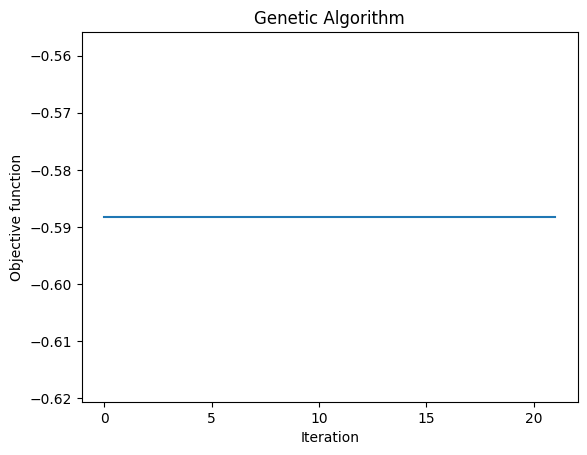

In [ ]:
ga_model = train_model_ga(data)

In [ ]:
joblib.dump(ga_model, 'naive_bayes_GA_model.pkl')

['naive_bayes_GA_model.pkl']

In [ ]:
evaluate_naive_bayes = evaluate_model(naive_bayes_model, data['X_test'], data['y_test'])
evaluate_pso = evaluate_model(pso_model[0], data['X_test'], data['y_test'])
evaluate_ga = evaluate_model(ga_model[0], data['X_test'], data['y_test'])

In [ ]:
pso_model[1]

5.23184444154392e-07

In [ ]:
ga_model[1]

1.07544920208213e-08

In [ ]:
# Print the results
print(f"Model accuracy: {evaluate_naive_bayes['accuracy']:.2f}")
print("\nClassification Report:")
print(evaluate_naive_bayes['classification_report'])

Model accuracy: 0.59

Classification Report:
                 precision    recall  f1-score   support

    bercak_daun       0.56      0.33      0.42        15
  daun_berkerut       0.63      0.63      0.63        19
  daun_berputar       0.54      0.54      0.54        13
daun_menggulung       0.60      0.75      0.67         8
 daun_menguning       0.59      0.77      0.67        13

       accuracy                           0.59        68
      macro avg       0.58      0.60      0.58        68
   weighted avg       0.59      0.59      0.58        68



In [ ]:
# Print the results
print(f"Model accuracy: {evaluate_pso['accuracy']:.2f}")
print("\nClassification Report:")
print(evaluate_pso['classification_report'])

Model accuracy: 0.59

Classification Report:
                 precision    recall  f1-score   support

    bercak_daun       0.56      0.33      0.42        15
  daun_berkerut       0.63      0.63      0.63        19
  daun_berputar       0.54      0.54      0.54        13
daun_menggulung       0.60      0.75      0.67         8
 daun_menguning       0.59      0.77      0.67        13

       accuracy                           0.59        68
      macro avg       0.58      0.60      0.58        68
   weighted avg       0.59      0.59      0.58        68



In [ ]:
# Print the results
print(f"Model accuracy: {evaluate_ga['accuracy']:.2f}")
print("\nClassification Report:")
print(evaluate_ga['classification_report'])

Model accuracy: 0.59

Classification Report:
                 precision    recall  f1-score   support

    bercak_daun       0.56      0.33      0.42        15
  daun_berkerut       0.63      0.63      0.63        19
  daun_berputar       0.54      0.54      0.54        13
daun_menggulung       0.60      0.75      0.67         8
 daun_menguning       0.59      0.77      0.67        13

       accuracy                           0.59        68
      macro avg       0.58      0.60      0.58        68
   weighted avg       0.59      0.59      0.58        68



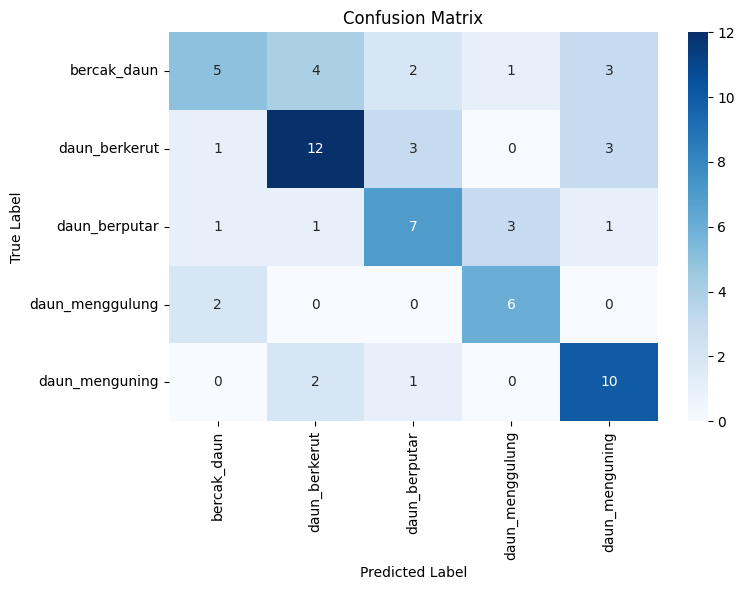

In [ ]:
display_confusion_matrix(evaluate_naive_bayes)

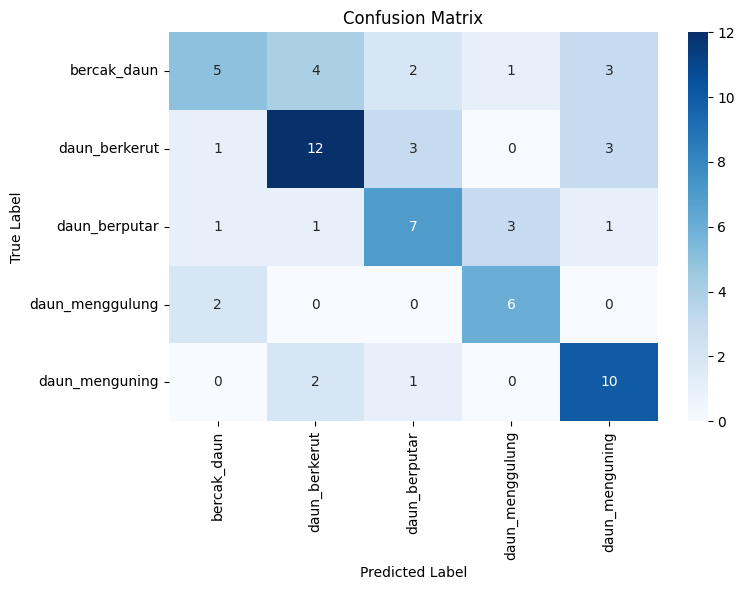

In [ ]:
display_confusion_matrix(evaluate_ga)

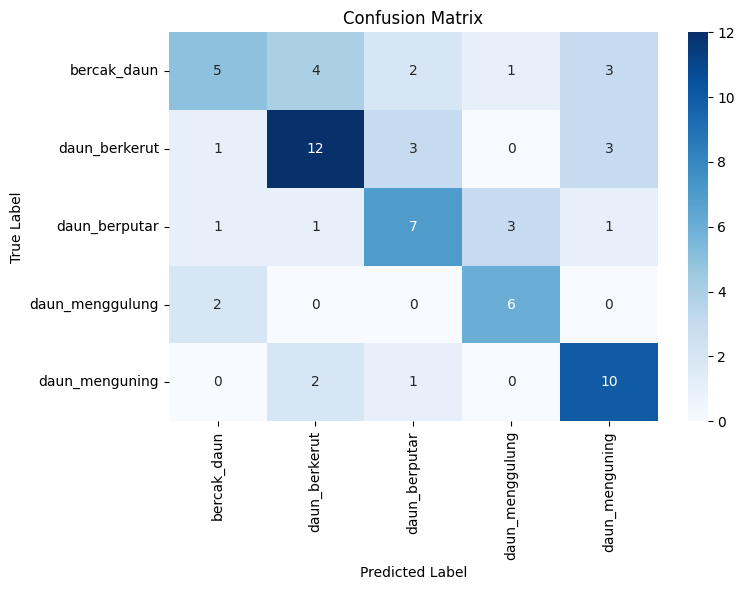

In [ ]:
display_confusion_matrix(evaluate_pso)

In [ ]:
def convert_to_grayscale(image):
    """
    Convert an image to grayscale using OpenCV.

    Parameters:
    image (numpy.ndarray): Input image array in BGR or RGB format

    Returns:
    numpy.ndarray: Grayscale image array
    """
    # Check if image is already grayscale
    if len(image.shape) == 2:
        return image

    # Check if image has alpha channel (RGBA/BGRA)
    if image.shape[2] == 4:
        # Remove alpha channel
        image = image[:, :, :3]

    # Convert to grayscale using OpenCV
    # Note: OpenCV uses BGR format by default
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return grayscale

In [ ]:
gray_images = batch_process_images(dataset_images, convert_to_grayscale)

Processing daun_menguning: 100%|██████████| 65/65 [00:00<00:00, 1239.57it/s]


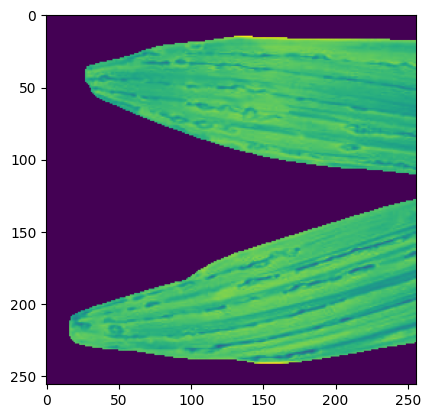

In [ ]:
# Display the processed image (optional)
plt.imshow(gray_images['daun_menguning'][1])
plt.axis('on')
plt.show()

In [ ]:
def save_processed_images2(processed_images, output_path):
    """
    Save processed binary images to the specified output path.

    Args:
    - processed_images (dict): Dictionary of processed binary images as returned by batch_process_images.
    - output_path (str): Path to save processed images.
    """
    for label, images in processed_images.items():
        label_output_path = os.path.join(output_path, label)
        os.makedirs(label_output_path, exist_ok=True)

        for i, img in enumerate(images):
            # Convert binary image (0/1) to proper image format (0/255)
            img_to_save = (img * 255).astype(np.uint8)

            # If the image is 2D (single channel), convert to 3 channels
            if len(img_to_save.shape) == 2:
                img_to_save = cv2.cvtColor(img_to_save, cv2.COLOR_GRAY2BGR)

            img_name = f"{label}_{i}.png"
            img_path = os.path.join(label_output_path, img_name)

            # Save the image
            success = cv2.imwrite(img_path, img_to_save)
            if not success:
                print(f"Warning: Failed to save image {img_name}")

        print(f"Saved {len(images)} images for label: {label}")

In [ ]:
save_processed_images2(gray_images, '/content/drive/MyDrive/DATASET/gray_images')

Saved 75 images for label: bercak_daun
Saved 95 images for label: daun_berkerut
Saved 65 images for label: daun_berputar
Saved 40 images for label: daun_menggulung
Saved 65 images for label: daun_menguning


In [ ]:
grouped_features = feature_table.groupby('Label').agg({
    'R': 'mean',
    'G': 'mean',
    'B': 'mean',
    'Contrast': 'mean',
    'Correlation': 'mean',
    'Energy': 'mean',
    'Homogeneity': 'mean'
}).round(2)

In [ ]:
grouped_features

,R,G,B,Contrast,Correlation,Energy,Homogeneity
Label,,,,,,,
bercak_daun,0.22,0.40,0.38,0.23,0.93,0.57,0.94
daun_berkerut,0.22,0.44,0.35,0.19,0.93,0.57,0.95
daun_berputar,0.25,0.38,0.37,0.23,0.92,0.73,0.96
daun_menggulung,0.27,0.35,0.39,0.36,0.93,0.60,0.93
daun_menguning,0.21,0.41,0.39,0.29,0.97,0.63,0.95


<ipython-input-53-ec5f3085bf4c>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - width, grouped_features['R'][i], f"{grouped_features['R'][i]:.1f}", ha='center', va='bottom')
<ipython-input-53-ec5f3085bf4c>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, grouped_features['G'][i], f"{grouped_features['G'][i]:.1f}", ha='center', va='bottom')
<ipython-input-53-ec5f3085bf4c>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

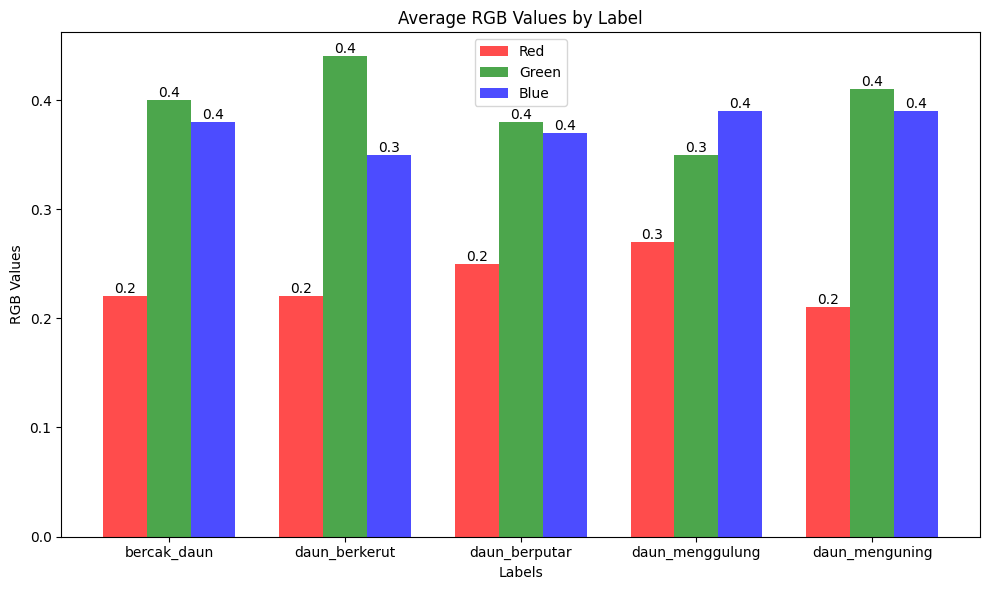

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Set the positions for the bars
labels = grouped_features.index
x = range(len(labels))
width = 0.25  # Width of the bars

# Create bars for each color channel
plt.bar([i - width for i in x], grouped_features['R'], width, label='Red', color='red', alpha=0.7)
plt.bar(x, grouped_features['G'], width, label='Green', color='green', alpha=0.7)
plt.bar([i + width for i in x], grouped_features['B'], width, label='Blue', color='blue', alpha=0.7)

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('RGB Values')
plt.title('Average RGB Values by Label')
plt.xticks(x, labels)
plt.legend()

# Add value labels on top of each bar
for i in x:
    plt.text(i - width, grouped_features['R'][i], f"{grouped_features['R'][i]:.1f}", ha='center', va='bottom')
    plt.text(i, grouped_features['G'][i], f"{grouped_features['G'][i]:.1f}", ha='center', va='bottom')
    plt.text(i + width, grouped_features['B'][i], f"{grouped_features['B'][i]:.1f}", ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.savefig('rgb_values_by_label.png')
plt.show()

<ipython-input-54-bf82c3793ba2>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 1.5*width, grouped_features['Contrast'][i],
<ipython-input-54-bf82c3793ba2>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{grouped_features['Contrast'][i]:.2f}", ha='center', va='bottom')
<ipython-input-54-bf82c3793ba2>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.5*width, grouped_features['Correlation'][i],
<ipyt

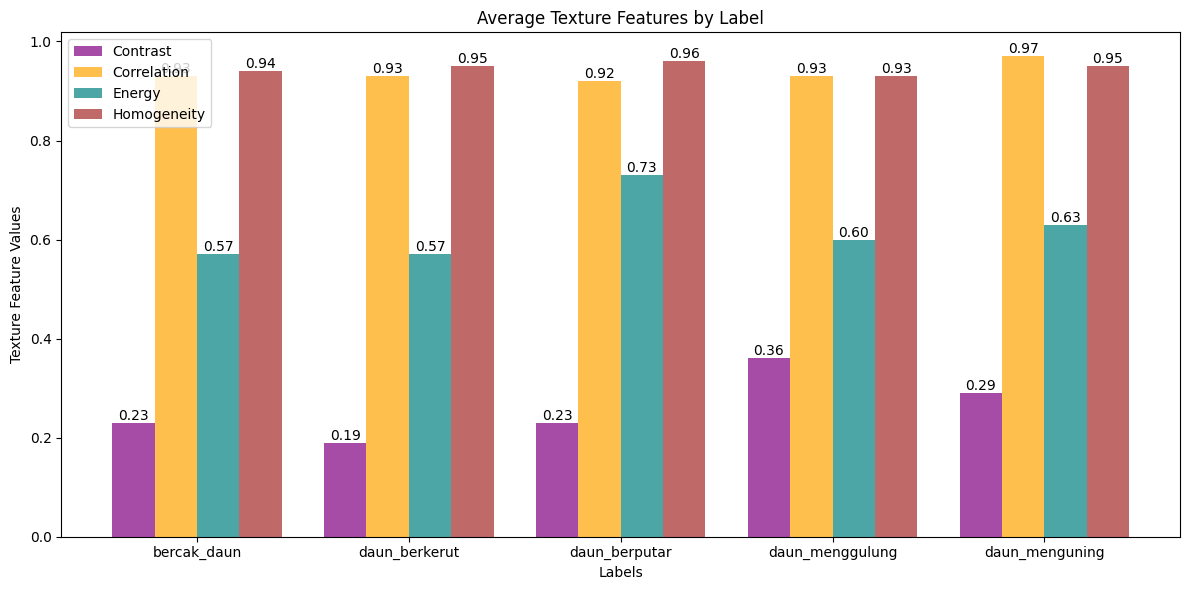

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))  # Made it slightly wider to accommodate 4 bars

# Set the positions for the bars
labels = grouped_features.index
x = range(len(labels))
width = 0.2  # Made bars slightly thinner since we have 4 features

# Create bars for each texture feature
plt.bar([i - 1.5*width for i in x], grouped_features['Contrast'], width,
        label='Contrast', color='purple', alpha=0.7)
plt.bar([i - 0.5*width for i in x], grouped_features['Correlation'], width,
        label='Correlation', color='orange', alpha=0.7)
plt.bar([i + 0.5*width for i in x], grouped_features['Energy'], width,
        label='Energy', color='teal', alpha=0.7)
plt.bar([i + 1.5*width for i in x], grouped_features['Homogeneity'], width,
        label='Homogeneity', color='brown', alpha=0.7)

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Texture Feature Values')
plt.title('Average Texture Features by Label')
plt.xticks(x, labels)
plt.legend()

# Add value labels on top of each bar
for i in x:
    plt.text(i - 1.5*width, grouped_features['Contrast'][i],
             f"{grouped_features['Contrast'][i]:.2f}", ha='center', va='bottom')
    plt.text(i - 0.5*width, grouped_features['Correlation'][i],
             f"{grouped_features['Correlation'][i]:.2f}", ha='center', va='bottom')
    plt.text(i + 0.5*width, grouped_features['Energy'][i],
             f"{grouped_features['Energy'][i]:.2f}", ha='center', va='bottom')
    plt.text(i + 1.5*width, grouped_features['Homogeneity'][i],
             f"{grouped_features['Homogeneity'][i]:.2f}", ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.savefig('texture_features_by_label.png')
plt.show()

In [ ]:
def plot_classification_metrics(classification_dict):
    """
    Create a bar plot of classification metrics (precision, recall, f1-score) for each class.

    Args:
        classification_dict: Dictionary containing classification metrics from evaluate_model
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Get the report text
    report_text = classification_dict['classification_report']

    # Split the report into lines
    lines = report_text.split('\n')

    # Initialize lists to store the data
    labels = []
    precision = []
    recall = []
    f1_score = []

    # Parse each line of the report
    for line in lines[2:-5]:  # Skip header and footer lines
        if line.strip():  # Skip empty lines
            parts = line.strip().split()
            # Handle multi-word class names
            if len(parts) > 5:  # If class name contains spaces
                label = ' '.join(parts[:-4])
                metrics = parts[-4:]
            else:
                label = parts[0]
                metrics = parts[1:]

            labels.append(label)
            precision.append(float(metrics[0]))
            recall.append(float(metrics[1]))
            f1_score.append(float(metrics[2]))

    # Plotting
    plt.figure(figsize=(12, 6))

    # Set the positions for the bars
    x = range(len(labels))
    width = 0.25  # Width of the bars

    # Create bars
    plt.bar([i - width for i in x], precision, width,
            label='Precision', color='purple', alpha=0.7)
    plt.bar(x, recall, width,
            label='Recall', color='orange', alpha=0.7)
    plt.bar([i + width for i in x], f1_score, width,
            label='F1-score', color='teal', alpha=0.7)

    # Customize the plot
    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.title('Classification Metrics by Class')
    plt.xticks([i for i in x], labels, rotation=45, ha='right')
    plt.legend()

    # Add value labels on top of each bar
    for i in x:
        plt.text(i - width, precision[i],
                f"{precision[i]:.2f}", ha='center', va='bottom')
        plt.text(i, recall[i],
                f"{recall[i]:.2f}", ha='center', va='bottom')
        plt.text(i + width, f1_score[i],
                f"{f1_score[i]:.2f}", ha='center', va='bottom')

    # Adjust layout and display
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 1.1)  # Set y-axis limit to 0-1.1 to accommodate labels
    plt.savefig('classification_metrics.png')
    plt.show()

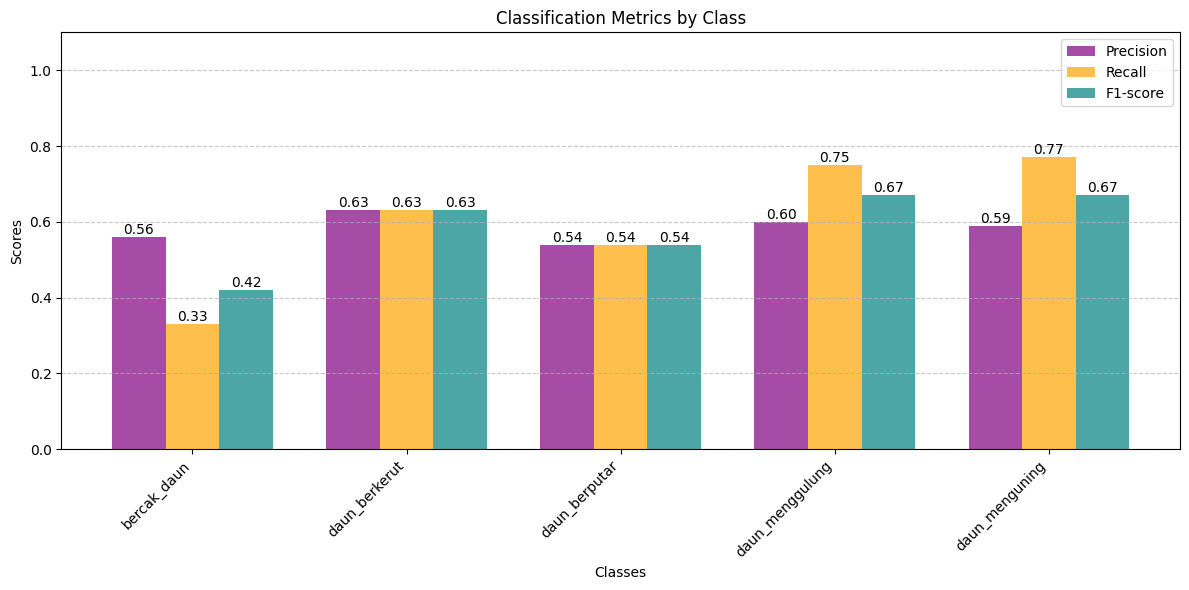

'                 precision    recall  f1-score   support\n\n    bercak_daun       0.56      0.33      0.42        15\n  daun_berkerut       0.63      0.63      0.63        19\n  daun_berputar       0.54      0.54      0.54        13\ndaun_menggulung       0.60      0.75      0.67         8\n daun_menguning       0.59      0.77      0.67        13\n\n       accuracy                           0.59        68\n      macro avg       0.58      0.60      0.58        68\n   weighted avg       0.59      0.59      0.58        68\n'

In [ ]:
plot_classification_metrics(evaluate_naive_bayes)
evaluate_naive_bayes['classification_report']